In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('data.xlsx')

C:\Users\AB\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


In [4]:
# Function that calculates the percentage of missing values
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]

calc_percent_NAs(df).head(10)

,percent


In [5]:
val = df['Cyclone_Inlet_Gas_Temp']
print(val)

0         867.63
1         879.23
2         875.67
3         875.28
4         891.66
           ...  
377714    899.42
377715     879.9
377716     887.2
377717     908.5
377718    880.86
Name: Cyclone_Inlet_Gas_Temp, Length: 377719, dtype: object


In [6]:
cols = df.drop(['time'], axis=1).columns

In [7]:
def countX(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count

def odd_values(lst):
    res = []
    for ele in lst:
        try:
            float(ele)
        except ValueError:
            res.append(ele)
    res1 = [*set(res)]
    print('for {},'.format(lst.name))
    for x in res1:
        num = countX(res, x)
        print('{} : {}'.format(x, num))
    print()
    return res1

In [8]:
val_list = []
for lst in cols:
    res = odd_values(df[lst])
    val_list.append(res)

for Cyclone_Inlet_Gas_Temp,
Not Connect : 723
Scan Timeout : 17
I/O Timeout : 470
Configure : 108
Comm Fail : 2

for Cyclone_Material_Temp,
Not Connect : 723
I/O Timeout : 470
Configure : 108
Unit Down : 271
Comm Fail : 2
Scan Timeout : 17

for Cyclone_Outlet_Gas_draft,
Not Connect : 723
I/O Timeout : 470
Configure : 108
Unit Down : 1
Comm Fail : 2
Scan Timeout : 17

for Cyclone_cone_draft,
Not Connect : 723
Scan Timeout : 17
I/O Timeout : 470
Configure : 108
Comm Fail : 2

for Cyclone_Gas_Outlet_Temp,
Not Connect : 723
I/O Timeout : 470
Configure : 108
Unit Down : 1
Comm Fail : 2
Scan Timeout : 17

for Cyclone_Inlet_Draft,
Not Connect : 723
I/O Timeout : 470
Configure : 108
Unit Down : 2
Comm Fail : 2
Scan Timeout : 17



In [9]:
odd_list = []
for i in range(len(cols)):
    for val in val_list[i]:
        if val in odd_list:
            continue
        else:
            odd_list.append(val)
print(odd_list)

['Not Connect', 'Scan Timeout', 'I/O Timeout', 'Configure', 'Comm Fail', 'Unit Down']


In [10]:
df3 = df

In [11]:
for col in df.columns:
    df3 = df3[~df3[col].isin(odd_list)]

In [12]:
df3 = df3.set_index('time')

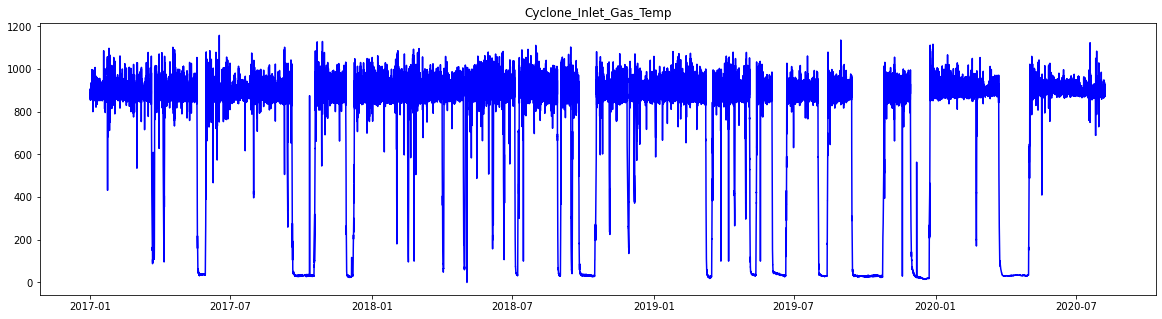

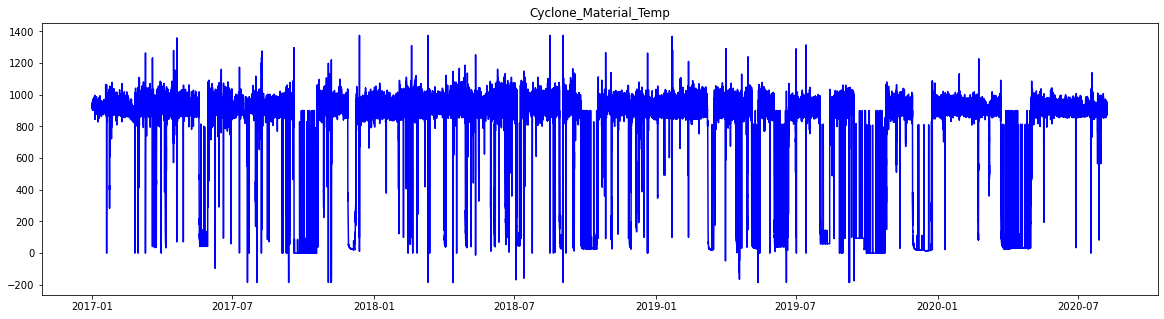

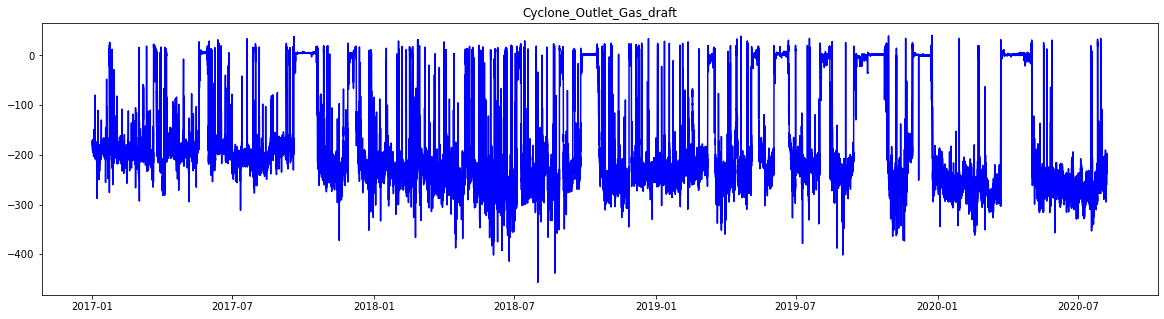

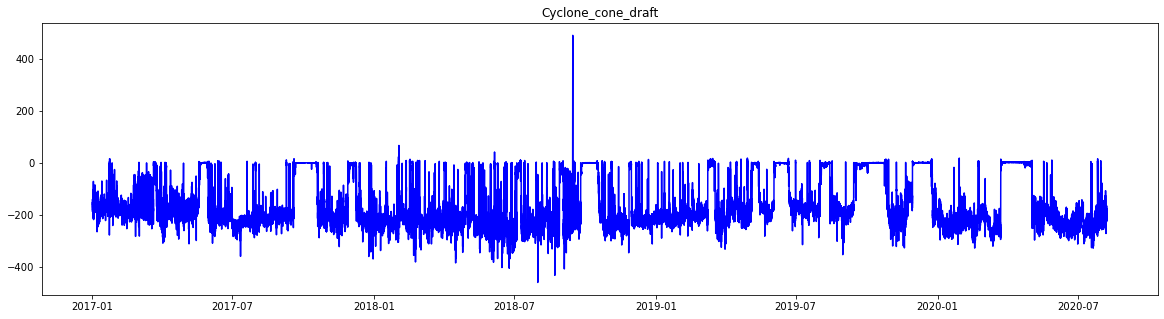

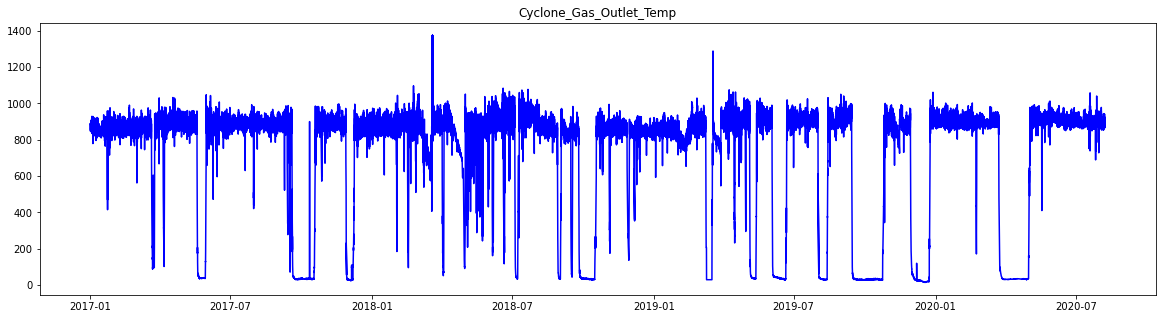

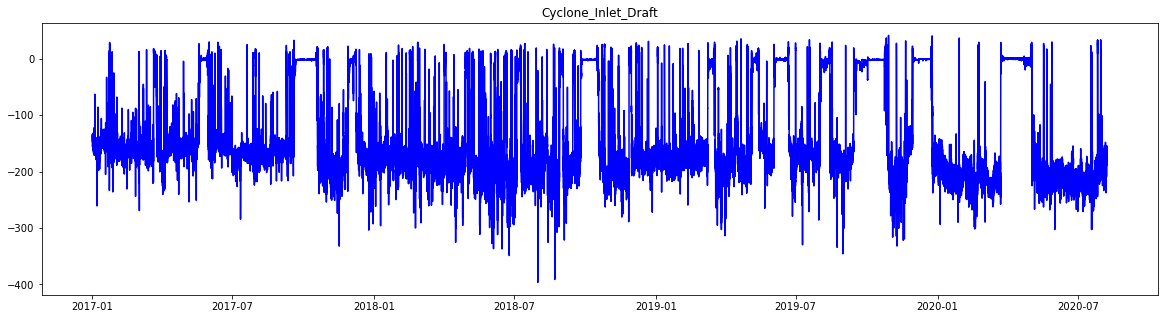

In [13]:
for name in cols:
    _ = plt.figure(figsize=(20,5))
    _ = plt.plot(df3[name], color='blue')
    _ = plt.title(name)
    plt.show()

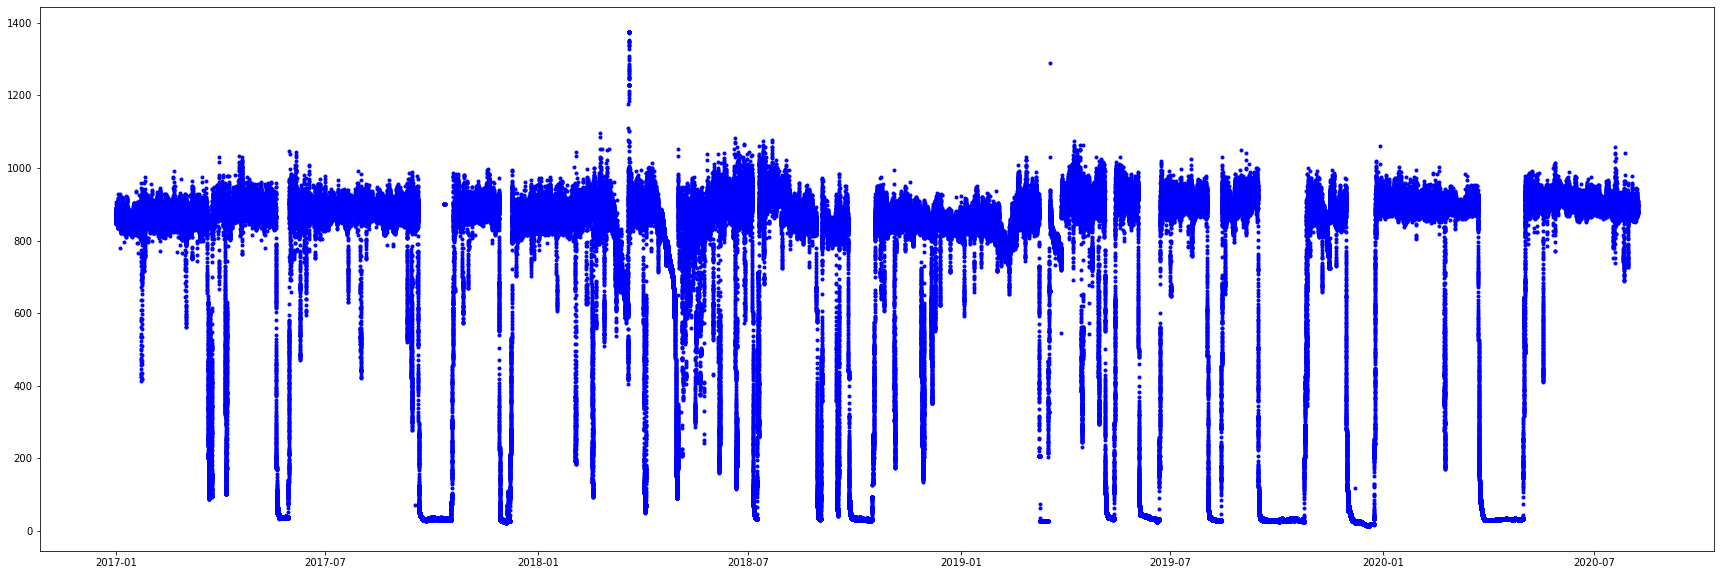

In [14]:
plott = plt.figure(figsize=(30,10))
plott = plt.scatter(df3.index, df3['Cyclone_Gas_Outlet_Temp'], c = "blue", marker='.')
plott = plt.show()

In [15]:
odd_list_updated = odd_list
odd_list_updated.remove('Unit Down')

In [16]:
odd_list_updated

['Not Connect', 'Scan Timeout', 'I/O Timeout', 'Configure', 'Comm Fail']

In [17]:
df2=df
df2['abnormality'] = [0 for ele in df2[cols[1]]]
df2['abnormality']

0         0
1         0
2         0
3         0
4         0
         ..
377714    0
377715    0
377716    0
377717    0
377718    0
Name: abnormality, Length: 377719, dtype: int64

In [18]:
tmp = df2['abnormality']
for col in cols:
    i = 0 
    for ele in df2[col]:
        if tmp[i] == 0:
            if ele == 'Unit Down':
                tmp[i] = 1
        i=i+1
print(tmp)
df2['abnormality'] = tmp

C:\Users\AB\AppData\Local\Temp/ipykernel_6576/3947593636.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[i] = 1


0         0
1         0
2         0
3         0
4         0
         ..
377714    0
377715    0
377716    0
377717    0
377718    0
Name: abnormality, Length: 377719, dtype: int64


In [19]:
for col in cols:
    tmp = df2[col]
    i = 0 
    for ele in df2[col]:
        if tmp[i] == 'Unit Down':
            tmp[i] = None
        i=i+1
    df2[col] = tmp

C:\Users\AB\AppData\Local\Temp/ipykernel_6576/4285517683.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[i] = None


In [20]:
for col in cols:
    df2 = df2[~df2[col].isin(odd_list_updated)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376399 entries, 0 to 377718
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      376399 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376399 non-null  object        
 2   Cyclone_Material_Temp     376128 non-null  object        
 3   Cyclone_Outlet_Gas_draft  376398 non-null  object        
 4   Cyclone_cone_draft        376399 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   376398 non-null  object        
 6   Cyclone_Inlet_Draft       376397 non-null  object        
 7   abnormality               376399 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 25.8+ MB


In [21]:
for col in cols:
    df2[col] = df2[col].fillna(df2[col].mean())

In [22]:
df2.set_index("time", inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 376399 entries, 2017-01-01 00:00:00 to 2020-08-07 12:15:00
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Cyclone_Inlet_Gas_Temp    376399 non-null  float64
 1   Cyclone_Material_Temp     376399 non-null  float64
 2   Cyclone_Outlet_Gas_draft  376399 non-null  float64
 3   Cyclone_cone_draft        376399 non-null  float64
 4   Cyclone_Gas_Outlet_Temp   376399 non-null  float64
 5   Cyclone_Inlet_Draft       376399 non-null  float64
 6   abnormality               376399 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 23.0 MB


In [23]:
df2.to_csv('cleaned.csv')